In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier

In [2]:
df= pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.duplicated().sum()

0

In [10]:
Survived = df['Survived'].value_counts().reset_index()


In [11]:
Survived

,Survived,count
0,0,549
1,1,342


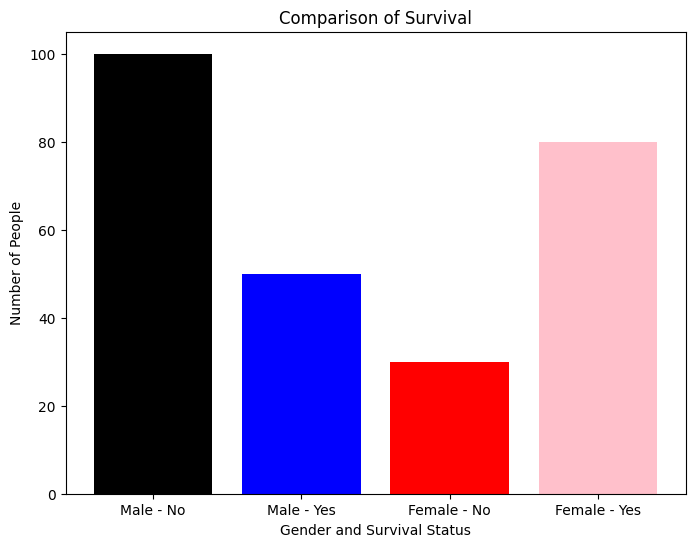

In [12]:
data = {'Survived': ['Male - No', 'Male - Yes', 'Female - No', 'Female - Yes'],
        'Counts': [100, 50, 30, 80]}  # replace with actual counts
Survived = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.bar(Survived['Survived'], Survived['Counts'],color=["Black","blue","red","pink"])
plt.xticks(Survived['Survived'])
plt.title('Comparison of Survival')
plt.xlabel('Gender and Survival Status')
plt.ylabel('Number of People')
plt.show()

In [13]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [14]:
inputs = df.drop('Survived',axis='columns')
target = df['Survived']

In [15]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
sex=pd.get_dummies(inputs.Sex)
sex.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [17]:
inputs=pd.concat([inputs,sex],axis="columns")
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False
3,1,female,35.0,53.1000,True,False
4,3,male,35.0,8.0500,False,True


In [18]:
inputs.drop(["Sex"],axis="columns",inplace=True)

In [19]:
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [20]:
inputs.isna().sum()

Pclass      0
Age       177
Fare        0
female      0
male        0
dtype: int64

In [21]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [22]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   Fare    891 non-null    float64
 3   female  891 non-null    bool   
 4   male    891 non-null    bool   
dtypes: bool(2), float64(2), int64(1)
memory usage: 22.7 KB


In [23]:
inputs.isna().sum()

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64

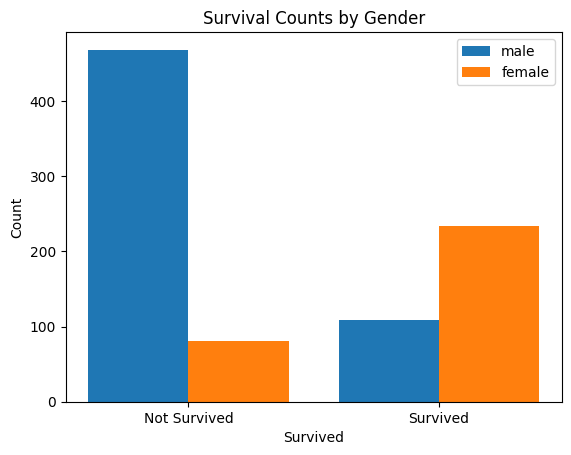

In [24]:
counts = df.groupby(['Survived', 'Sex']).size().unstack().fillna(0)

# Define the bar width
bar_width = 0.40
index = counts.index

# Plotting
fig, ax = plt.subplots()

# Plot bars for each Sex
bar1 = ax.bar(index - bar_width/2, counts['male'], bar_width, label='male')
bar2 = ax.bar(index + bar_width/2, counts['female'], bar_width, label='female')

# Setting labels and title
ax.set_xlabel('Survived')
ax.set_ylabel('Count')
ax.set_title('Survival Counts by Gender')
ax.set_xticks(index)
ax.set_xticklabels(['Not Survived', 'Survived'])
ax.legend()

# Display the plot
plt.show()

In [25]:
X_train, X_test, y_train, y_test=train_test_split(inputs,target,test_size=0.2)

In [26]:
X_train

,Pclass,Age,Fare,female,male
890,3,32.000000,7.7500,False,True
695,2,52.000000,13.5000,False,True
718,3,29.699118,15.5000,False,True
750,2,4.000000,23.0000,True,False
569,3,32.000000,7.8542,False,True
...,...,...,...,...,...
537,1,30.000000,106.4250,True,False
166,1,29.699118,55.0000,True,False
570,2,62.000000,10.5000,False,True
704,3,26.000000,7.8542,False,True


In [27]:
X_test

,Pclass,Age,Fare,female,male
390,1,36.000000,120.0000,False,True
414,3,44.000000,7.9250,False,True
255,3,29.000000,15.2458,True,False
677,3,18.000000,9.8417,True,False
457,1,29.699118,51.8625,True,False
...,...,...,...,...,...
436,3,21.000000,34.3750,True,False
841,2,16.000000,10.5000,False,True
681,1,27.000000,76.7292,False,True
518,2,36.000000,26.0000,True,False


In [28]:
y_train

890    0
695    0
718    0
750    1
569    1
      ..
537    1
166    1
570    1
704    0
106    1
Name: Survived, Length: 712, dtype: int64

In [29]:
y_test

390    1
414    1
255    1
677    1
457    1
      ..
436    0
841    0
681    1
518    1
148    0
Name: Survived, Length: 179, dtype: int64

In [30]:
inputs.corr()

,Pclass,Age,Fare,female,male
Pclass,1.000000,-0.331339,-0.549500,-0.131900,0.131900
Age,-0.331339,1.000000,0.091566,-0.084153,0.084153
Fare,-0.549500,0.091566,1.000000,0.182333,-0.182333
female,-0.131900,-0.084153,0.182333,1.000000,-1.000000
male,0.131900,0.084153,-0.182333,-1.000000,1.000000


In [31]:
import seaborn as sns

<Axes: >

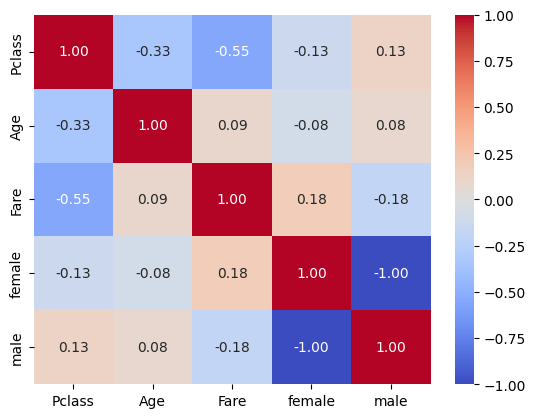

In [32]:
sns.heatmap(inputs.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [33]:
model=RandomForestClassifier()

In [34]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
model.score(X_test,y_test)

0.8156424581005587

In [36]:
pre=model.predict(X_test)

In [37]:
matrices=r2_score(pre,y_test)
matrices

0.202834008097166